# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [221]:
# Load pickled data
import pickle

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [222]:
import numpy as np
import cv2

# Number of training examples
n_train = y_train.shape[0]

# Number of testing examples.
n_test = y_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

43



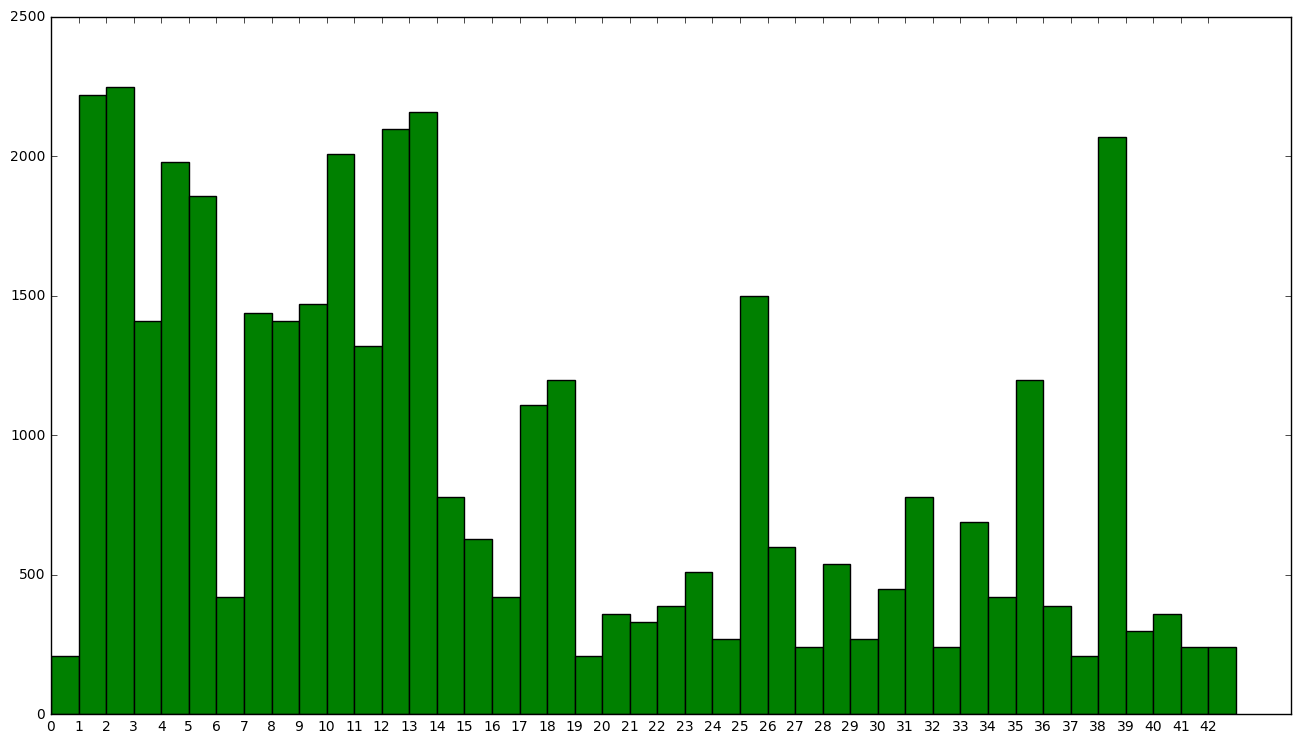

In [239]:
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

label_count = Counter(y_train)
print(len(label_count))
print()

plt.figure(figsize=(16,9))
plt.bar(label_count.keys(), label_count.values(), width=1, color='g')
plt.xticks(range(len(label_count)))
plt.show()

We can see that the training dataset is not very balanced, with lots of speed limit signs and keep right. We may also have a problem predicting "Speed limit (20km/h)" as it is very similar to other speed limit signs but with significantly fewer training examples.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
1. **Grayscaling**—Instead of just flattening the three color channels evenly, I used PCA and tried to preserve as much variance as possible for each frame, so that we could have more color information on our grayscale images, in the mean time reducing the dimension makes training our network easier.

2. **Normalization**—At times images may have poor contrast or in a range that are really different from other images, yet information as such are irrelevant in regard to our problem. By normalizing/standardizing the brightness it is easier for our optimization algorithm to find the optimal point of our cost function.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
#### Data separation
60.5% of data is kept for training while 15.1% hold out for validation and 24.4% for testing.

#### Data augmentation
The following methods are applied to augment the data:
 * **Random channel shift**—this shifts the values of each channel a little bit to change the color of the traffic signs. Due to differnt lighting conditions, images captured by the sensor may not always have the correct white balance. I believe this augmentation can simulate such situations.
 * **Random brightness**—this shifts the brightness of the images by a small amount to simulate the "incorrect" exposure values of the images.
 * **Random translation**—we may not always have sign in the center of the image. We can simulate this by randomly shifting the images by 5 pixels on both axes, and pad the holes with zeros.
 
The new training dataset is twice in length of the orginal training set and contains the orignal dataset and the augmented dataset created by randomly applying the above functions.

In [241]:
from sklearn.model_selection import train_test_split

# Create validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=42)


assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   31367 samples
Validation Set: 7842 samples
Test Set:       12630 samples


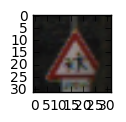

28


In [242]:
import random

index = random.randint(0, len(X_train))
image = X_train[index]

plt.figure(figsize=(1,1))
plt.imshow(image)
plt.show()
print(y_train[index])

In [243]:
# Data Augmentation
# Apply random brightness shift to image
def random_channel_shift(x, intensity, channel_index=0):
    x = np.rollaxis(x, channel_index, 0)
    min_x, max_x = np.min(x), np.max(x)
    channel_images = [np.clip(x_channel + np.random.uniform(-intensity, intensity), min_x, max_x)
                      for x_channel in x]
    x = np.stack(channel_images, axis=0)
    x = np.rollaxis(x, 0, channel_index+1)
    return x

# Apply random brightness to image
def augment_brightness_camera_images(image):
    random_bright = .25 + np.random.uniform()
    image[:,:,2] = image[:,:,2]*random_bright
    return image

def trans_image(image, steer, trans_range):
    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    steer_ang = steer + tr_x/trans_range*2*.2
    tr_y = 8*np.random.uniform()-8/2
    #tr_y = 0
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    image_tr = cv2.warpAffine(image, Trans_M, (32, 32))
    
    return image_tr, steer_ang

aug_list = []
for i in range(1):
    for image in X_train:
        img = random_channel_shift(image, 10, 2)
        img = augment_brightness_camera_images(img)
        img = trans_image(img, 1, 10)[0]
        aug_list.append(img)
    

aug_data = np.array(aug_list)

print(aug_data[0].shape)

X_train = np.concatenate((X_train, aug_data), axis=0)
y_train = np.tile(y_train, 2)
print(X_train.shape)
print(y_train.shape)

(32, 32, 3)
(62734, 32, 32, 3)
(62734,)


In [244]:
from sklearn.decomposition import PCA

def process_image(image):
    imshape = image.shape
    # Inspect Image
#     print('This image is:', type(image), 'with dimesions:', imshape)

    temp = image.reshape(imshape[0] * imshape[1], 3)
    pca = PCA(n_components=1, whiten=True)
    pca.fit(temp)
    temp2 = image.reshape(imshape[0] * imshape[1], 3)
    temp2 = pca.transform(temp2)
    temp2 = temp2.reshape(imshape[0], imshape[1])    
        
    def normalize(image):
        pixel_max = np.max(image)
        pixel_min = np.min(image)
        
        return ((255 / (pixel_max - pixel_min)) * image - 255 * pixel_min / (pixel_max - pixel_min)).astype('uint8')

    temp2 = normalize(temp2)
    gray = temp2
  
    return gray

In [245]:
# Normalization + PCA Grayscaling + Gaussian Blur
X_train_gray = []
X_validation_gray = []
X_test_gray = []

for image in X_train:
    X_train_gray.append(process_image(image))

for image in X_validation:
    X_validation_gray.append(process_image(image))
    
for image in X_test:
    X_test_gray.append(process_image(image))

X_train_gray = np.asarray(X_train_gray)
X_validation_gray = np.asarray(X_validation_gray)
X_test_gray = np.asarray(X_test_gray)

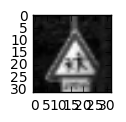

27105


In [246]:
image = X_train_gray[index]
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
plt.show()
print(index)

In [247]:
# Reshape data for Tensorflow
X_train_reshape = []
X_validation_reshape = []
X_test_reshape = []

for image in X_train_gray:
    X_train_reshape.append(np.expand_dims(image, axis=2))
for image in X_validation_gray:
    X_validation_reshape.append(np.expand_dims(image, axis=2))
for image in X_test_gray:
    X_test_reshape.append(np.expand_dims(image, axis=2))

X_train = np.asarray(X_train_reshape)
X_validation = np.asarray(X_validation_reshape)
X_test = np.asarray(X_test_reshape)


In [248]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(62734, 32, 32, 1)
(7842, 32, 32, 1)
(12630, 32, 32, 1)


In [249]:
from tensorflow.contrib.layers import flatten
import tensorflow as tf
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=42)
n_classes = 43 # Total classes (0-9 digits)

# Hyperparameters
EPOCHS = 65
BATCH_SIZE = 128
dropout_conv = 0.9 # Dropout, probability to keep units
dropout_fc = 0.9 # Dropout, probability to keep units
starter_learning_rate = 0.1
rate = 0.001
beta = tf.constant(0.01) # L2 regularization constant
mu = 0
sigma = 0.02

# Placeholders
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob_conv = tf.placeholder(tf.float32)
keep_prob_fc = tf.placeholder(tf.float32)

def conv2d(x, W, b, strides=1, padding='SAME'):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2, padding='VALID'):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding=padding)

def conv_net(x, weights, biases, dropout_conv, dropout_fc):
    # Convolution Layer
    conv1 = conv2d(x, weights['conv1_W'], biases['conv1_b'])
    # Max Pooling
    conv1 = maxpool2d(conv1, k=2)
    # Dropout
    conv1 = tf.nn.dropout(conv1, dropout_conv)
    
    # Convolution Layer
    conv2 = conv2d(conv1, weights['conv2_W'], biases['conv2_b'])
    # Max Pooling
    conv2 = maxpool2d(conv2, k=2)
    # Dropout
    conv2 = tf.nn.dropout(conv2, dropout_conv)
    
    # Convolution Layer
    conv3 = conv2d(conv2, weights['conv3_W'], biases['conv3_b'])
    # Max Pooling
    conv3 = maxpool2d(conv3, k=2)
    # Dropout
    conv3 = tf.nn.dropout(conv3, dropout_conv)

    # Fully connected layer
    # Flatten
    fc0 = flatten(conv3)
    fc1 = tf.matmul(fc0, weights['fc1_W']) + biases['fc1_b']
    fc1 = tf.nn.relu(fc1)
    # Dropout
    fc1 = tf.nn.dropout(fc1, dropout_fc)
    
    # Fully Connected
    fc2 = tf.matmul(fc1, weights['fc2_W']) + biases['fc2_b']
    fc2 = tf.nn.relu(fc2)
    # Dropout
    fc2 = tf.nn.dropout(fc2, dropout_fc)
    
    # Fully Connected
    fc3 = tf.matmul(fc2, weights['fc3_W']) + biases['fc3_b']
    fc3 = tf.nn.relu(fc3)
    # Dropout
    fc3 = tf.nn.dropout(fc3, dropout_fc)

    # Fully Connected
    logits = tf.matmul(fc3, weights['fc4_W']) + biases['fc4_b']

    return logits

weights = {
    # Convolutional. Input = 32x32x1. Output = 32x32x6.
    'conv1_W': tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 6), mean=mu, stddev=sigma, seed=0, name='weights_conv1')),
    # Convolutional. Input = 16x16x6. Output = 16x16x16
    'conv2_W': tf.Variable(tf.truncated_normal(shape=(3, 3, 6, 16), mean=mu, stddev=sigma, seed=0, name='weights_conv2')),
    # Convolutional. Input = 8x8x16. Output = 8x8x40
    'conv3_W': tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 40), mean=mu, stddev=sigma, seed=0, name='weights_conv3')),
    # Fully Connected. Input = 640. Output = 320.
    'fc1_W': tf.Variable(tf.truncated_normal(shape=(640, 320), mean=mu, stddev=sigma, seed=0, name='weights_fc1')),
    # Fully Connected. Input = 320. Output = 120.
    'fc2_W': tf.Variable(tf.truncated_normal(shape=(320, 120), mean=mu, stddev=sigma, seed=0, name='weights_fc2')),
    # Input = 120. Output = 84
    'fc3_W': tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma, seed=0, name='weights_fc3')),
    # Fully Connected. Input = 84. Output = 43.
    'fc4_W': tf.Variable(tf.truncated_normal(shape=(84, 43), mean=mu, stddev=sigma, seed=0, name='weights_fc4'))
}

biases = {
    'conv1_b': tf.Variable(tf.zeros(6), name='biases_conv1'),
    'conv2_b': tf.Variable(tf.zeros(16), name='biases_conv2'),
    'conv3_b': tf.Variable(tf.zeros(40), name='biases_conv3'),
    'fc1_b': tf.Variable(tf.zeros(320), name='biases_fc1'),
    'fc2_b': tf.Variable(tf.zeros(120), name='biases_fc2'),
    'fc3_b': tf.Variable(tf.zeros(84), name='biases_fc3'),
    'fc4_b': tf.Variable(tf.zeros(43), name='biases_fc4')
}

# Construct model
pred = conv_net(x, weights, biases, keep_prob_conv, keep_prob_fc)
pred_prob = tf.nn.softmax(pred)

# Define loss and optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, one_hot_y))

# Loss function using L2 Regularization
regularizer = 0
for w in weights:
    regularizer += tf.nn.l2_loss(weights[w])
# loss = tf.reduce_mean(loss + beta * regularizer)
loss = tf.reduce_mean(loss)

global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 50, 0.9, staircase=True)

# Evaluate model
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss, global_step=global_step)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

A CNN of four convolutional layers and four fully connected layers are used here.

#### Architecture
* **Input Layer**—1@32x32
* **Convolutional Layer 1**—6@32x32
    * **Pooling Layer**—6@16x16
    * **Relu**—6@16x16
* **Convolutional Layer 2**—16@16x16
    * **Pooling Layer**—16@8x8
    * **Relu**—16@8x8
* **Convolutional Layer 3**—40@8x8
    * **Pooling Layer**—40@4x4
    * **Relu**—40@4x4
* **Fully Connected Layer 1**—640
* **Fully Connected Layer 2**—320
* **Fully Connected Layer 3**—120
* **Output Layer**—84

Kernel of size 3x3 is used across all convolutional layers so the architecture is a bit VGG like. A dropout of 0.9 is applied at the end of each layer including both convoluational and fully connected ones.

In [250]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob_conv: 1., keep_prob_fc: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [252]:
import time
start_time = time.time()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
#     sess.run(tf.initialize_all_variables())
    
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
#         X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob_conv: dropout_conv, keep_prob_fc: dropout_fc})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
        test_accuracy = evaluate(X_test, y_test)
        print("EPOCH {} ...".format(i+1))
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        print()

    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'mynet')
    print("Model saved")

print("Training/Predicting took {} seconds.".format(time.time() - start_time))

Training...

EPOCH 1 ...
Validation Accuracy = 0.418

EPOCH 1 ...
Test Accuracy = 0.406

EPOCH 2 ...
Validation Accuracy = 0.725

EPOCH 2 ...
Test Accuracy = 0.685

EPOCH 3 ...
Validation Accuracy = 0.846

EPOCH 3 ...
Test Accuracy = 0.798

EPOCH 4 ...
Validation Accuracy = 0.902

EPOCH 4 ...
Test Accuracy = 0.841

EPOCH 5 ...
Validation Accuracy = 0.923

EPOCH 5 ...
Test Accuracy = 0.860

EPOCH 6 ...
Validation Accuracy = 0.943

EPOCH 6 ...
Test Accuracy = 0.874

EPOCH 7 ...
Validation Accuracy = 0.951

EPOCH 7 ...
Test Accuracy = 0.882

EPOCH 8 ...
Validation Accuracy = 0.954

EPOCH 8 ...
Test Accuracy = 0.882

EPOCH 9 ...
Validation Accuracy = 0.956

EPOCH 9 ...
Test Accuracy = 0.883

EPOCH 10 ...
Validation Accuracy = 0.966

EPOCH 10 ...
Test Accuracy = 0.892

EPOCH 11 ...
Validation Accuracy = 0.969

EPOCH 11 ...
Test Accuracy = 0.903

EPOCH 12 ...
Validation Accuracy = 0.969

EPOCH 12 ...
Test Accuracy = 0.897

EPOCH 13 ...
Validation Accuracy = 0.977

EPOCH 13 ...
Test Accuracy 

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
#### Hyperparameters
* **Number of Epochs and batch size:**
    * EPOCHS = 70
    * BATCH_SIZE = 256
* **Dropout rate**:
    * Rate for convolutional layer: dropout_conv = 0.9
    * Rate for convolutional layer: dropout_fc = 0.9
* **Optimizer**:
    * Adam Optimizer with learning rate dacay
        * Initial learning rate: starter_learning_rate = 0.1
        * Discount factor: 0.9
        * Stop decaying after 50 epochs
* **Initial weight settings**:
    * mu = 0
    * sigma = 0.1

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

It is known that the same DNN architecture can be useful for addressing different problems. In our case the LeNet was originally used for classifying images. So as suggested I decided to use LeNet as a starting point.

Below are the steps and I took to come up with the current solution.

1. **LeNet Template—**as said earlier, I used the same CNN architecture with exactly the same hyperparameter settings. And ended up with a quite good result at around 95%.

2. **L2 Regularization—**tried L2 regularization, which boosted the performance to 96%.

3. **Dropout—**added 0.8 dropout along with the L2 regularization, which boosted the performance around 0.3~0.5%. Also I took the chance to refactor my code so that I can change the dropout rate to 1.0 when testing the model on the validation dataset. I experimented a bit with the dropout rate and managed to achieve about 2% improvement in accuracy. The accuracy is now at around 98.2%.

4. **Removed L2 Regularization—**this boosted the performance about 0.1%, which is probably negligible. Nonetheless the extra complexity doesn't add anything to the game so I decided to remove it.

5. **Image normalization and PCA grayscaling—**I combined the 3 channels of the image into 1 while preserving about 95% of variance, which I believe is a far better way than just flattening the channels with average. Also normalization is applied to each image to give each image the same exposure. The two methods combines gives about 0.1% performance boost, which is probably, again, negligible. However, grayscaling itself should make it easier to train the CNN, and so is normalization. It won't hurt and is potentially good for later so it's a keeper.

6. **Data Augmentation—**I decided to give data augmentation a try. I won't go into detail about the data augmentation as it is already answered in Question 2. I was acutally really excited about data augmentation. Unfortunately it doesn't help. It could be due to the way I do it, or that the augmented images are really different from the original data source. That said, it doesn't hurt either. I was thinking that maybe I could experiment it a bit further later. So it's a keeper.

7. **Number of Epochs—**one thing I didn't mention is that I change the epoch numbers each time I added something to the recipe. Basically each time a change is made it makes the network somewhat different and may require more or less training iterations. So I would examine the training history and change it accordingly.

8. **Batch size—**rumor has it that the smaller the batch size usually the better (at the cost of longer training time). I would like to see if this rumor works in my case so gave it a shot. The original LeNet network was training using a batch of size 128. I experimented 16, 64 and realized it wasn't helping. So I tried 256 to see if it'd make it any worse. Turned out it not only it wasn't making it any worse, it also shortened the training time by a lot, without compromising the performance.

9. **CNN Architecture—**I didn't want to start changing the network architecture early on because the design of CNN architecture seems to be a completely trial-and-error process. LeNet was one of the early design that was proven useful, so I thought it should be quite robust and didn't want to do much change to it until necessary. At this point I was running out of ideas of what to try so decided to give VGG a try. Below are th changes I made to the network:
    * Changed kernel size to 3
    * Changed padding to 'SAME' to that it's easier to manage the layer dimensions
    * Added one extra convolutional layer and adjusted the widths of each layer a bit
    * Added one extra fully connected layer and adjusted the widths of each layer a bit
    
    The result turned out to be amazing. It added about 1% accuracy to the already quite good result.
    
10. **Use learning rate decay in Adam Optimizer—**it gives another extra boost of 0.1~0.2% to the accuracy and seems to make the result more robust (the result didn't fluctuate as much now).

11. **Other minor changes—**I tried tuning a few other parameters, such as mean and standard deviation of the inital weights, tuning dropout rates for convolutional layer and fully connected layers separately. Different optimizers and different learning rate hyperparameters. Can't remember what are kept and what aren't. In the end the result is at about 99.3% on the validation dataset.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [189]:
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = plt.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

new_images = load_images_from_folder('sign_examples/converted')

Number of new images: 11
Image dimension: (32, 32, 3)


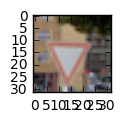

0


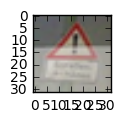

1


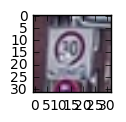

2


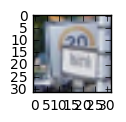

3


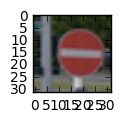

4


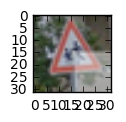

5


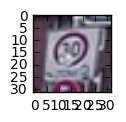

6


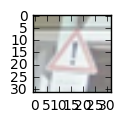

7


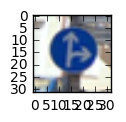

8


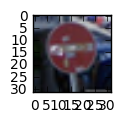

9


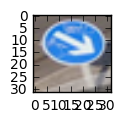

10


In [220]:
print("Number of new images: {}".format(len(new_images)))
print("Image dimension: {}".format(new_images[0].shape))
for i, image in enumerate(new_images):
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.show()
    print(i)

In [191]:
new_images_gray = []

for image in new_images:
    new_images_gray.append(process_image(image))

new_images_gray = np.asarray(new_images_gray)

4
(32, 32)


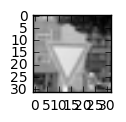

In [192]:
index = random.randint(0, len(new_images_gray))

plt.figure(figsize=(1,1))
plt.imshow(new_images_gray[0], cmap='gray')
print(index)
print(new_images_gray[0].shape)

In [193]:
new_images_reshape = []

for image in new_images_gray:
    new_images_reshape.append(np.expand_dims(image, axis=2))

new_images_reshape = np.asarray(new_images_reshape)

In [194]:
# Create placeholder labels for new_images
new_images_y = np.array([13, 18, 1, 0, 17, 28, 1, 18, 36, 17, 38])

In [195]:
print(new_images_y[:5])
print(new_images_y.shape)

[13 18  1  0 17]
(11,)


In [196]:
import time
start_time = time.time()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
#     sess.run(tf.initialize_all_variables())
    
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
#         X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob_conv: dropout_conv, keep_prob_fc: dropout_fc})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
        new_images_accuracy = evaluate(new_images_reshape, new_images_y)
        print("EPOCH {} ...".format(i+1))
        print("New Images Accuracy = {:.3f}".format(new_images_accuracy))
        print()
        
    y = sess.run(pred_prob, feed_dict = {x: new_images_reshape, y: new_images_y, keep_prob_conv: 1.0, keep_prob_fc: 1.0})
    
    print(y)

print("Training/Predicting took {} seconds.".format(time.time() - start_time))

Training...

EPOCH 1 ...
Validation Accuracy = 0.501

EPOCH 1 ...
New Images Accuracy = 0.273

EPOCH 2 ...
Validation Accuracy = 0.760

EPOCH 2 ...
New Images Accuracy = 0.364

EPOCH 3 ...
Validation Accuracy = 0.856

EPOCH 3 ...
New Images Accuracy = 0.364

EPOCH 4 ...
Validation Accuracy = 0.911

EPOCH 4 ...
New Images Accuracy = 0.545

EPOCH 5 ...
Validation Accuracy = 0.925

EPOCH 5 ...
New Images Accuracy = 0.364

EPOCH 6 ...
Validation Accuracy = 0.935

EPOCH 6 ...
New Images Accuracy = 0.455

EPOCH 7 ...
Validation Accuracy = 0.952

EPOCH 7 ...
New Images Accuracy = 0.455

EPOCH 8 ...
Validation Accuracy = 0.961

EPOCH 8 ...
New Images Accuracy = 0.364

EPOCH 9 ...
Validation Accuracy = 0.962

EPOCH 9 ...
New Images Accuracy = 0.364

EPOCH 10 ...
Validation Accuracy = 0.972

EPOCH 10 ...
New Images Accuracy = 0.364

EPOCH 11 ...
Validation Accuracy = 0.970

EPOCH 11 ...
New Images Accuracy = 0.455

EPOCH 12 ...
Validation Accuracy = 0.973

EPOCH 12 ...
New Images Accuracy = 0.36

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Out of the images with above 98% confidence, there is one image mislabelled. The "No Entry" sign is mislabelled as "Priority Road". A closer inspection seems to suggest that there is a big white spot of reflection in middle of the sign which maybe the cause of the mistake.

With confidence above 98%: [0, 4, 8, 9, 10]
Mislabelled: [1, 2, 3, 6, 7, 9]
Correctly labelled: [0, 8, 10, 4, 5]
Confident and mislabelled: [9]

Mislabelled image.


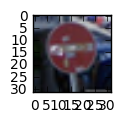


Confident images.


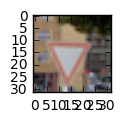

0


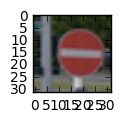

4


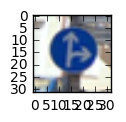

8


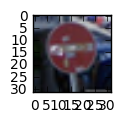

9


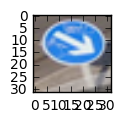

10


In [216]:
import operator
y_pred = [max(enumerate(pred), key=operator.itemgetter(1))[0] for pred in y]
y_pred_prob = [max(enumerate(pred), key=operator.itemgetter(1))[1] for pred in y]

confident_indices = [i for i, x in enumerate(y_pred_prob) if x > 0.98]
wrong_indices = [i for i, x in enumerate(y_pred) if x != new_images_y[i]]
correct_indices = list(set(range(11)) - set(wrong_indices))

wrong_and_confident = [x for x in wrong_indices if x in confident_indices]

print("With confidence above 98%: {}".format(confident_indices))
print("Mislabelled: {}".format(wrong_indices))
print("Correctly labelled: {}".format(correct_indices))
print("Confident and mislabelled: {}".format(wrong_and_confident))
print()

print("Mislabelled image.")
for i in wrong_and_confident:
    plt.figure(figsize=(1,1))
    plt.imshow(new_images[i])
    plt.show()

print()
print("Confident images.")
for i in confident_indices:
    plt.figure(figsize=(1,1))
    plt.imshow(new_images[i])
    plt.show()
    print(i)

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

No. The accuracy is at 45.4% compared to the accuracy 91.9% of the test set. Also, by looking at the predicting progress we can see that the prediction is extremely unstable. A small change on the number of epochs can dramatically change the prediction which can result in higher or lower accuracy.

In [200]:
counter = 0

for i, x in enumerate(y_pred):
    if x == new_images_y[i]:
        counter +=1

print("New Images accuracy: {}".format(counter/len(new_images_y)))

New Images accuracy: 0.45454545454545453


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

All of the correct predictions are among the predictions that the model is certain of. We can see that the wrong predictions are made on those with shadows cast upon, blocked by some objects, or with a strong distortion as the images are collected from Google Maps. This is normal since our news examples are drawn from a distribution different from the original training set. We might be able to improve the prediction by further augmenting the data, with random shadow cast or affine transformation.

In [219]:
top_5 = sorted([(i, x) for i, x in enumerate(y_pred_prob)], key=lambda x: x[1], reverse=True)[:5]
print("Top 5 probabilities: {}".format(top_5))
print("Correct predictions: {}".format(correct_indices))

Top 5 probabilities: [(4, 0.99999201), (0, 0.99987185), (9, 0.99984777), (10, 0.99305677), (8, 0.98719424)]
Correct predictions: [0, 8, 10, 4, 5]
